# Imports

In [1]:
import dill
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import numpy as np
import sys
from pathlib import Path

# Adjust this to point to the directory containing `unimib_snowit_project`
project_root = Path.cwd().parent
sys.path.append(str(project_root))

import src.unimib_snowit_project.utils as u

# Setup


In [2]:
# Directory where PKL files are stored
DATA_PKL_DIR = 'data_loaded'

# Filenames
USERS_PKL_FILENAME = 'users.pkl'
PROFILES_PKL_FILENAME = 'profiles.pkl'
CARDS_PKL_FILENAME = 'cards.pkl'
ORDERS_PKL_FILENAME = 'orders.pkl'
ORDER_DETAILS_PKL_FILENAME = 'order_details.pkl'

# Root directory path
root_dir_path = u.get_root_dir()  # Assumes this returns a Path object

# Full paths to PKL files
data_pkl_dir_path = root_dir_path / DATA_PKL_DIR
users_pkl_path = data_pkl_dir_path / USERS_PKL_FILENAME
profiles_pkl_path = data_pkl_dir_path / PROFILES_PKL_FILENAME
cards_pkl_path = data_pkl_dir_path / CARDS_PKL_FILENAME
orders_pkl_path = data_pkl_dir_path / ORDERS_PKL_FILENAME
order_details_pkl_path = data_pkl_dir_path / ORDER_DETAILS_PKL_FILENAME

# Function to load PKL files
def load_pkl(pkl_path):
    with pkl_path.open('rb') as fh:
        return dill.load(fh)

# Load DataFrames
users_df = load_pkl(users_pkl_path)
profiles_df = load_pkl(profiles_pkl_path)
cards_df = load_pkl(cards_pkl_path)
orders_df = load_pkl(orders_pkl_path)
order_details_df = load_pkl(order_details_pkl_path)

# Merge DataFrames
df = users_df.merge(
    profiles_df,
    how='left',
    on='user.uid',  # Assuming this column is shared and named the same
    suffixes=('', '_profile')
)

# Today's Date for Age Calculation
today = pd.Timestamp(datetime.today().date())

# Age Calculation
df['age'] = (today - pd.to_datetime(df['birthday'], errors='coerce')).dt.days // 365


# Customer Data Analysis

### 1. AGE DISTRIBUTION


Age KPIs:
Mean age: 27.33
Median age: 26.00
Mode age: [21.]


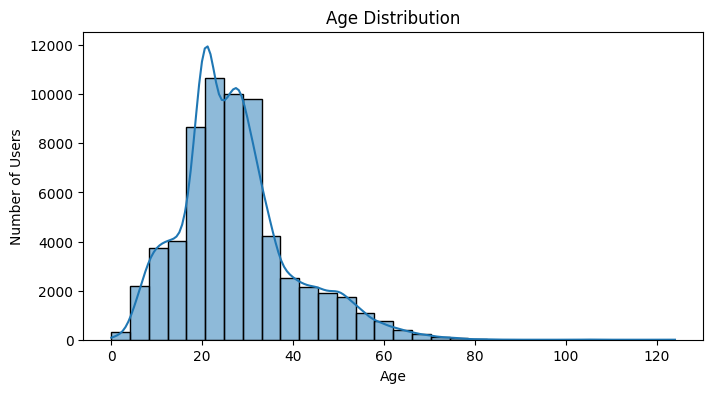

In [3]:
print("Age KPIs:")
print(f"Mean age: {df['age'].mean():.2f}")
print(f"Median age: {df['age'].median():.2f}")
print(f"Mode age: {df['age'].mode().values}")

plt.figure(figsize=(8, 4))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()


### 2. GENDER DISTRIBUTION



Gender Distribution (%):
sex
M    58.849783
F    41.150217
Name: proportion, dtype: float64


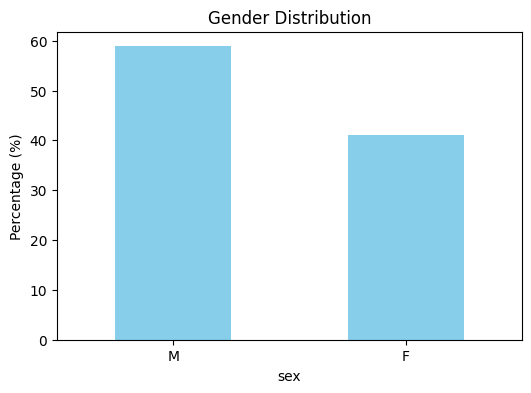

In [4]:
gender_counts = df['sex'].value_counts(normalize=True) * 100
print("\nGender Distribution (%):")
print(gender_counts)

plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color='skyblue')
plt.title("Gender Distribution")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

### 3. TOP CITIES



 Top 10 Cities by User Count:
city
milano     51986
roma        9115
torino      7965
brescia     6663
bergamo     6487
monza       4332
como        3728
bologna     3706
genova      3322
lecco       2894
Name: count, dtype: int64


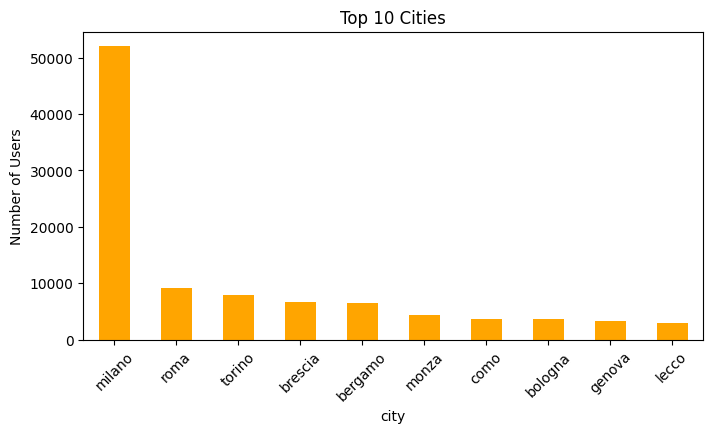

In [5]:
top_cities = df['city'].value_counts().head(10)
print("\n Top 10 Cities by User Count:")
print(top_cities)

plt.figure(figsize=(8, 4))
top_cities.plot(kind='bar', color='orange')
plt.title("Top 10 Cities")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

### 4. REGISTRATION SOURCE



 Registration Source Distribution (%):
source
website        65.374795
app            21.659214
terze_parti     9.517201
welfare          3.44879
Name: proportion, dtype: Float64


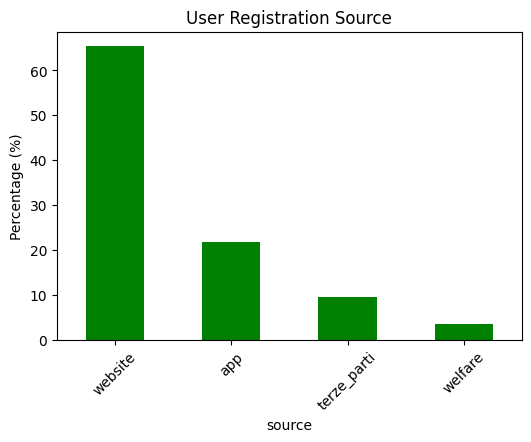

In [6]:
source_counts = df['source'].value_counts(normalize=True) * 100
print("\n Registration Source Distribution (%):")
print(source_counts)

plt.figure(figsize=(6, 4))
source_counts.plot(kind='bar', color='green')
plt.title("User Registration Source")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

### 5. ANONYMOUS VS REGISTERED USERS



 Anonymous vs Registered (%):
isAnonymous
False    84.623843
True     15.376157
Name: proportion, dtype: Float64


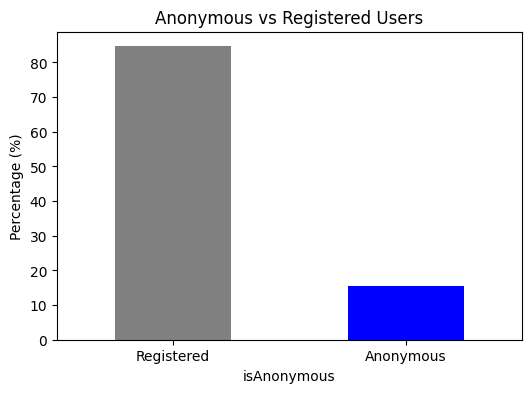

In [7]:
anon_counts = df['isAnonymous'].value_counts(normalize=True) * 100
print("\n Anonymous vs Registered (%):")
print(anon_counts)

plt.figure(figsize=(6, 4))
anon_counts.plot(kind='bar', color=['gray', 'blue'])
plt.title("Anonymous vs Registered Users")
plt.ylabel("Percentage (%)")
plt.xticks([0, 1], ['Registered', 'Anonymous'], rotation=0)
plt.show()

### 6. PREFERRED LANGUAGES



 Top Languages Used:
language
it    481082
en     30418
de      1084
fr        58
nl        11
sv        11
zh         9
es         8
cs         6
ru         5
Name: count, dtype: Int64


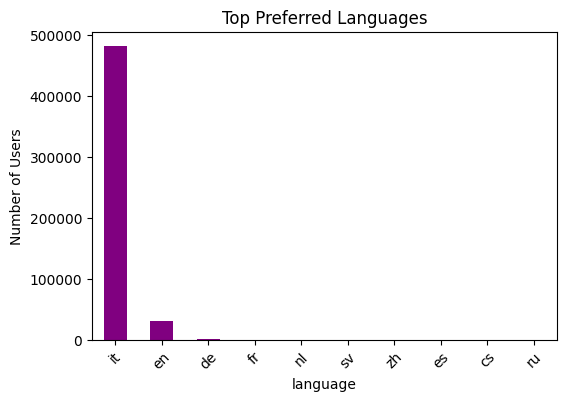

In [8]:
lang_counts = df['language'].value_counts().head(10)
print("\n Top Languages Used:")
print(lang_counts)

plt.figure(figsize=(6, 4))
lang_counts.plot(kind='bar', color='purple')
plt.title("Top Preferred Languages")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

### 7. REFERRALS



 Referral Behavior:
Average referralsCount: 0.04


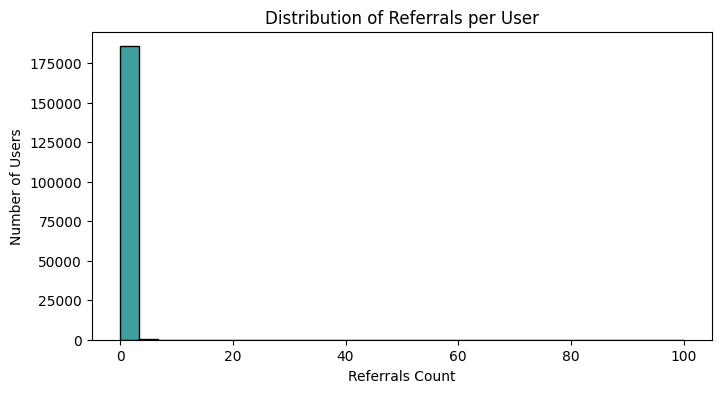

In [9]:
print("\n Referral Behavior:")
print(f"Average referralsCount: {df['referralsCount'].mean():.2f}")

plt.figure(figsize=(8, 4))
sns.histplot(df['referralsCount'].dropna(), bins=30, color='teal')
plt.title("Distribution of Referrals per User")
plt.xlabel("Referrals Count")
plt.ylabel("Number of Users")
plt.show()

# Purchase Data Analysis 

## Products Descriptions KPIs

### Purchases by Product Category

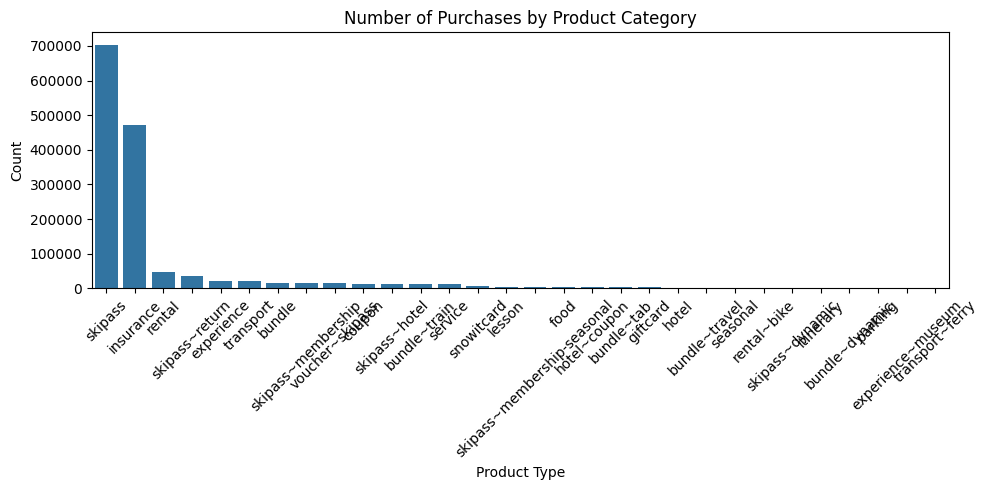

In [10]:
category_counts = order_details_df['product.type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Number of Purchases by Product Category")
plt.ylabel("Count")
plt.xlabel("Product Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Spending & Discounts by Category

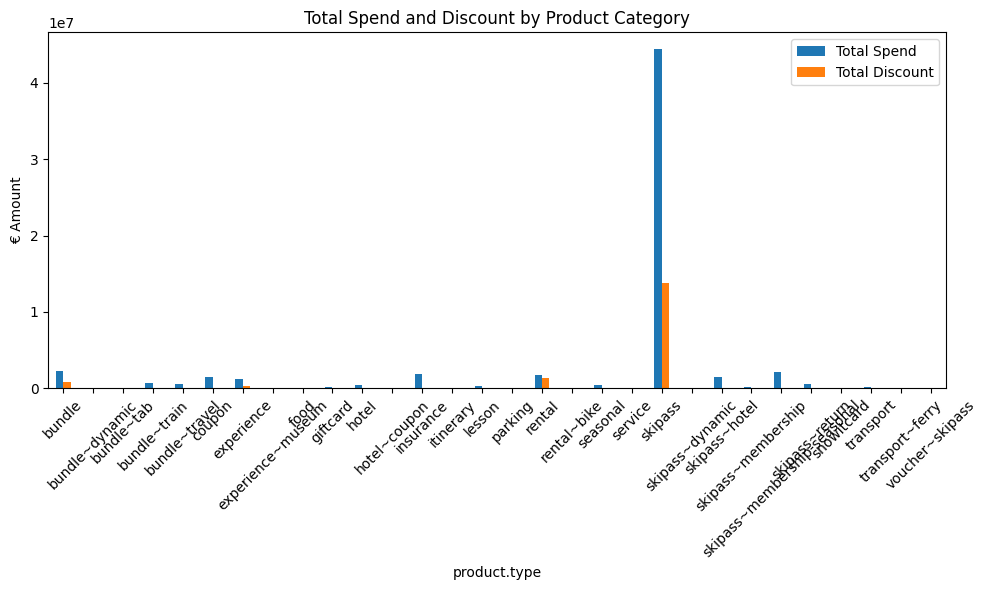

In [11]:
order_details_df['item.discount'] = order_details_df['item.discount'].astype(bool)
order_details_df['discount_value'] = order_details_df.apply(lambda row: row['item.amount'] if row['item.discount'] else 0, axis=1)

category_spending = order_details_df.groupby('product.type')['item.amount'].sum().sort_values(ascending=False)
category_discount = order_details_df.groupby('product.type')['discount_value'].sum()

spend_df = pd.DataFrame({
    'Total Spend': category_spending,
    'Total Discount': category_discount
})

spend_df.plot(kind='bar', figsize=(10, 6))
plt.title("Total Spend and Discount by Product Category")
plt.ylabel("€ Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Average Behaviour KPIs

### Average recency (days from the last purchase)

In [12]:
last_purchase = orders_df.groupby('user.uid')['createdAt'].max()
recency_days = (orders_df['createdAt'].max() - last_purchase).dt.days
avg_recency = recency_days.mean()
print(f"Average Recency (days): {avg_recency:.2f}")

Average Recency (days): 311.02


### Frequency per Month

In [13]:
order_range = orders_df.groupby('user.uid')['createdAt'].agg(['min', 'max'])
months_active = (order_range['max'] - order_range['min']).dt.days / 30.0
order_counts = orders_df['user.uid'].value_counts()
valid_users = months_active > 0
frequency_per_month = (order_counts[valid_users] / months_active[valid_users])
print(f"Average Purchase Frequency per Month: {frequency_per_month.mean():.2f}")

Average Purchase Frequency per Month: 7.76


### Spending and Discount per Month

In [14]:
# Aggregate total spending per order
order_total = order_details_df.groupby('order.uid')['item.amount'].sum().reset_index()
order_total = order_total.rename(columns={'item.amount': 'order_total_amount'})

# Merge back with orders_df
orders_df = orders_df.merge(order_total, on='order.uid', how='left')

# Compute total spending per user
user_spending = orders_df.groupby('user.uid')['order_total_amount'].sum()

# Filter users with months_active > 0 (to avoid division by zero)
valid_users = months_active > 0

# Calculate spending per month
spend_per_month = (user_spending[valid_users] / months_active[valid_users]).dropna()

print(f"Average Monthly Spending: {spend_per_month.mean():.2f} €")


Average Monthly Spending: 689.83 €


### Spending and Purchases per Channel

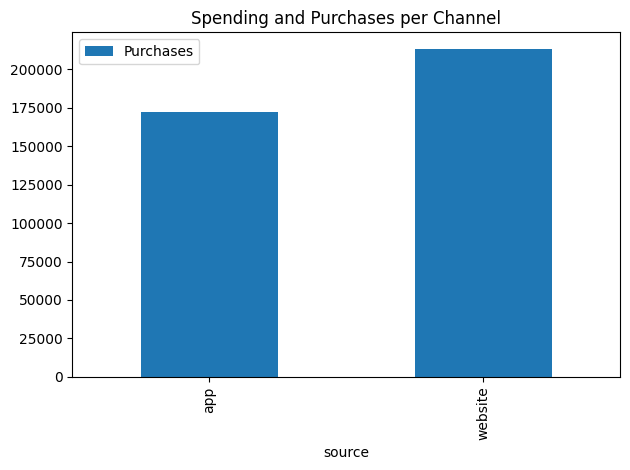

In [15]:
channel_stats = orders_df.groupby('source')['order.uid'].count()
channel_spend = orders_df.groupby('source'), order_details_df['item.amount'].sum()
channel_df = pd.DataFrame({'Purchases': channel_stats, 'Total Spend': channel_spend})
channel_df.plot(kind='bar', secondary_y='Total Spend', title='Spending and Purchases per Channel')
plt.tight_layout()
plt.show()

## Typical Basket KPIs

Typical Basket KPIs:
         total_items   total_spend  discount_spend  unique_categories  \
count  549900.000000  5.499000e+05    5.499000e+05      549900.000000   
mean        2.583384  1.102035e+02    2.964139e+01           1.716959   
std         2.193997  1.963382e+02    1.042231e+02           0.691676   
min         1.000000 -5.684342e-14   -2.842171e-14           1.000000   
25%         1.000000  4.410000e+01    0.000000e+00           1.000000   
50%         2.000000  5.950000e+01    0.000000e+00           2.000000   
75%         3.000000  1.080000e+02    0.000000e+00           2.000000   
max       208.000000  2.399000e+04    6.180000e+03           7.000000   

       discount_rate  spend_per_category  
count  543373.000000        5.499000e+05  
mean        0.226645        7.085393e+01  
std         0.403999        1.390047e+02  
min         0.000000       -2.842171e-14  
25%         0.000000        2.500000e+01  
50%         0.000000        3.600000e+01  
75%         0.000000

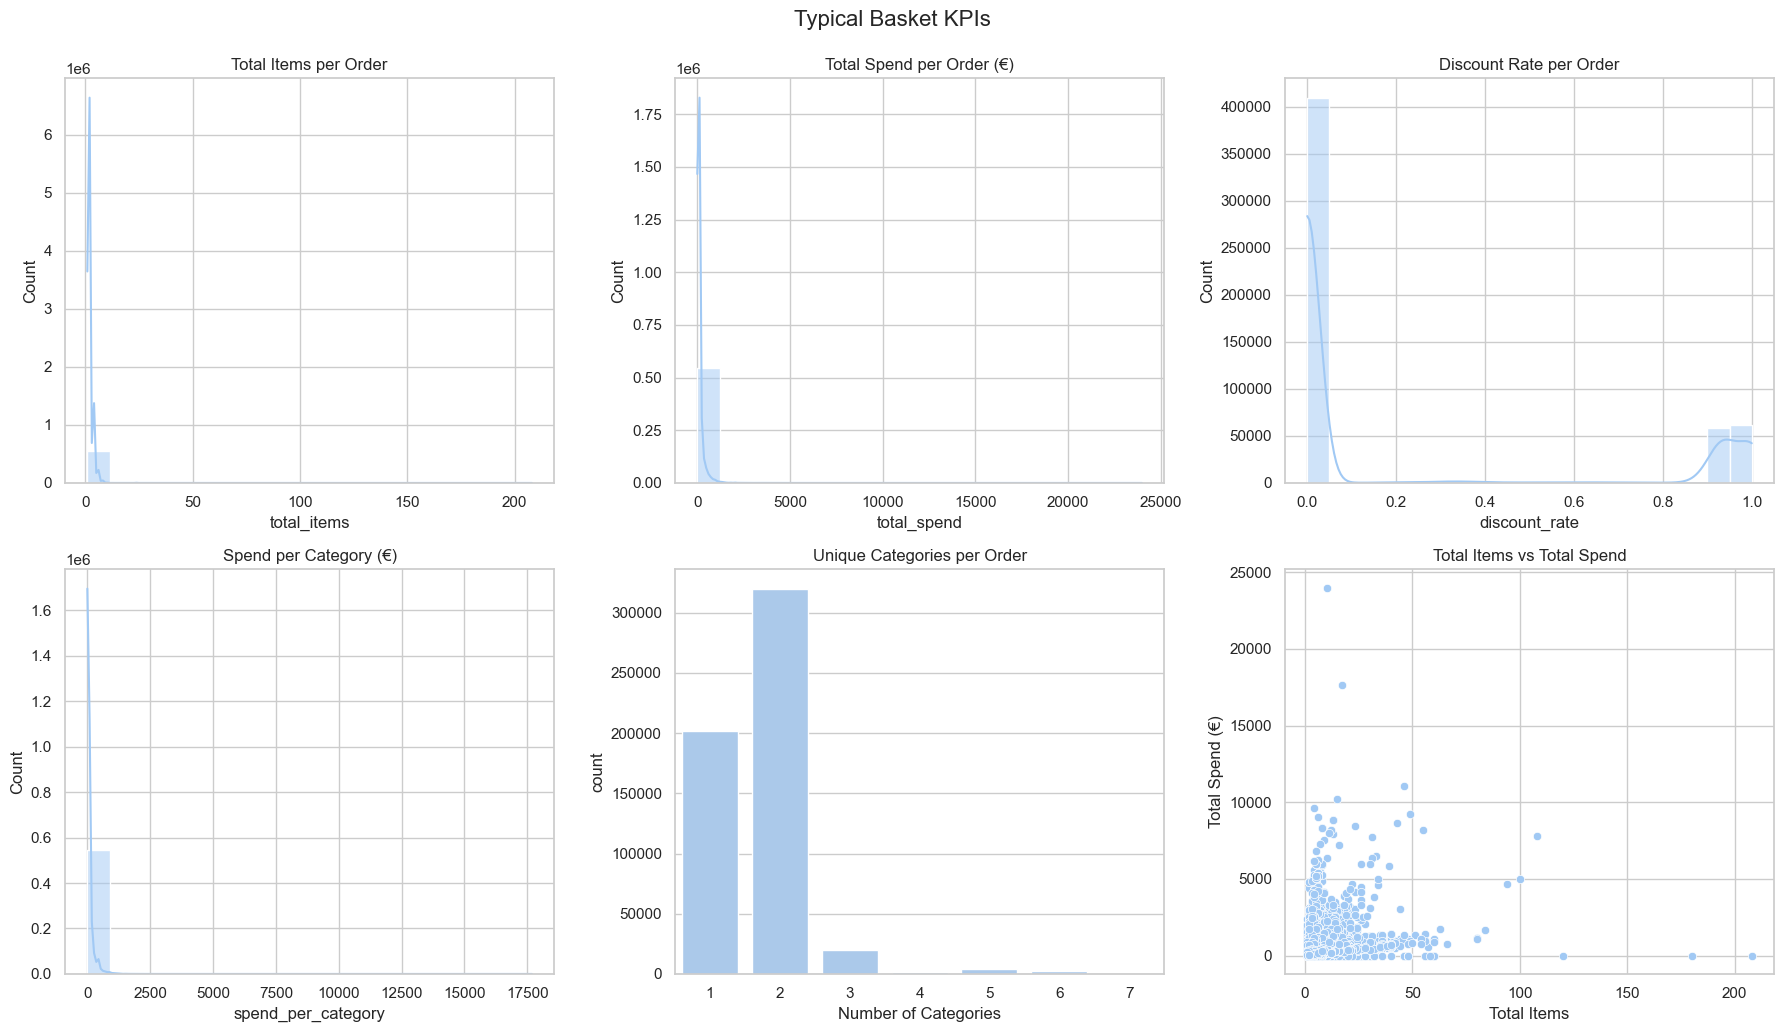

In [16]:
basket = order_details_df.groupby('order.uid').agg(
    total_items=('item.uid', 'count'),
    total_spend=('item.amount', 'sum'),
    discount_spend=('discount_value', 'sum'),
    unique_categories=('product.type', pd.Series.nunique)
)
basket['discount_rate'] = basket['discount_spend'] / basket['total_spend']
basket['spend_per_category'] = basket['total_spend'] / basket['unique_categories']
print("Typical Basket KPIs:")
print(basket.describe())

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Total Items per Order
sns.histplot(basket['total_items'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Total Items per Order")

# Total Spend per Order
sns.histplot(basket['total_spend'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Total Spend per Order (€)")

# Discount Rate per Order
sns.histplot(basket['discount_rate'], bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Discount Rate per Order")

# Spend per Category
sns.histplot(basket['spend_per_category'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Spend per Category (€)")

# Unique Categories per Order
sns.countplot(x=basket['unique_categories'], ax=axes[1, 1])
axes[1, 1].set_title("Unique Categories per Order")
axes[1, 1].set_xlabel("Number of Categories")

# Total Items vs Total Spend
sns.scatterplot(x='total_items', y='total_spend', data=basket, ax=axes[1, 2])
axes[1, 2].set_title("Total Items vs Total Spend")
axes[1, 2].set_xlabel("Total Items")
axes[1, 2].set_ylabel("Total Spend (€)")

plt.tight_layout()
plt.suptitle("Typical Basket KPIs", fontsize=16, y=1.03)
plt.show()

### % Spent per category per purchase

            order.uid product.type  percent_spent
0  0013wz6tllybz6dczg      skipass       1.000000
1  0017mrhxxacpmtxoyz      skipass       1.000000
2  001ar3c4lxvfkbzd3h      skipass       1.000000
3  001fdz17elk1ch5crr    insurance       0.052632
4  001fdz17elk1ch5crr      skipass       0.947368


/var/folders/yn/2fsl3m3j6t1gbkfscznw62s80000gn/T/ipykernel_10132/1894630124.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette="viridis")


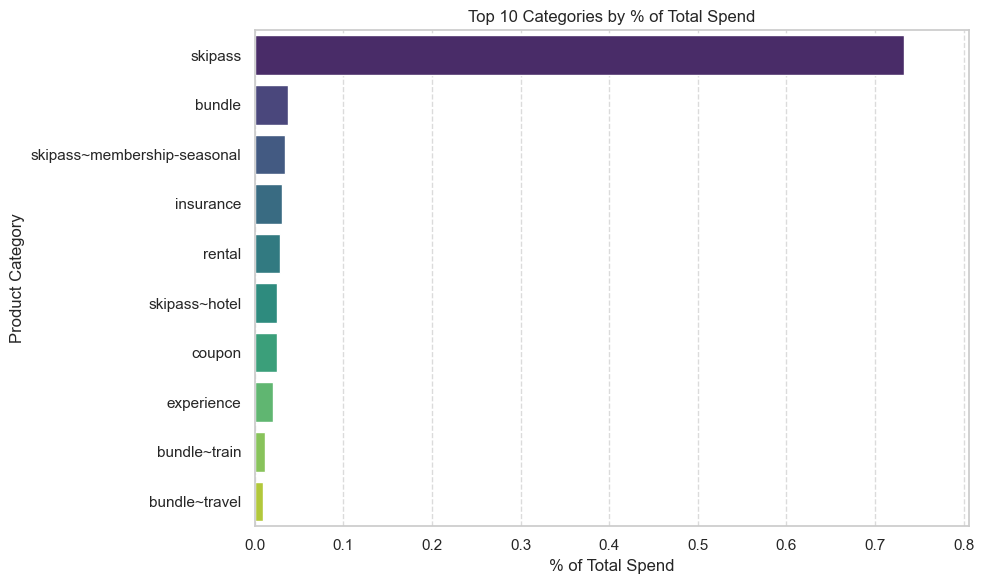

In [17]:
category_share = order_details_df.groupby(['order.uid', 'product.type'])['item.amount'].sum()
category_total = order_details_df.groupby('order.uid')['item.amount'].sum()
category_percent = (category_share / category_total).reset_index(name='percent_spent')
print(category_percent.head())
total_spent_by_category = order_details_df.groupby('product.type')['item.amount'].sum()

# Total spend across all categories
total_spent_all = total_spent_by_category.sum()

# Percent spent per category
percent_spent_by_category = (total_spent_by_category / total_spent_all).sort_values(ascending=False)

# Top 10 categories
top_10_categories = percent_spent_by_category.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette="viridis")

plt.title('Top 10 Categories by % of Total Spend')
plt.xlabel('% of Total Spend')
plt.ylabel('Product Category')
plt.xlim(0, top_10_categories.values.max() * 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Customers by Number of Purchases

/var/folders/yn/2fsl3m3j6t1gbkfscznw62s80000gn/T/ipykernel_10132/3607672019.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f"{int(x/1000)} K" for x in ax1.get_yticks()])


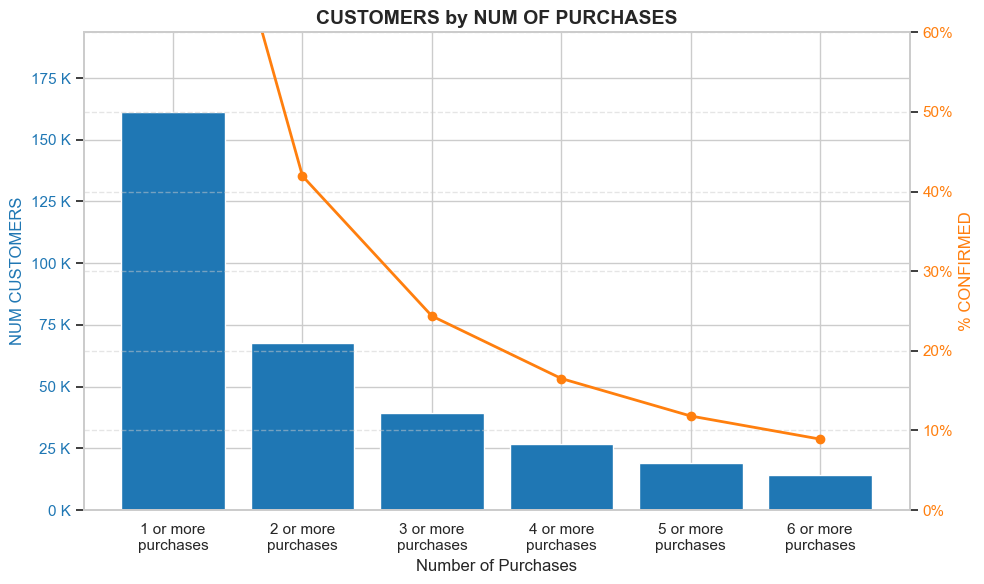

In [18]:
# Count number of purchases per customer
purchase_counts = orders_df['user.uid'].value_counts()

# Define bins (1+, 2+, 3+, ..., 6+)
bins = [1, 2, 3, 4, 5, 6]
customer_counts = [(purchase_counts >= i).sum() for i in bins]
percent_confirmed = [x / customer_counts[0] * 100 for x in customer_counts]
labels = [f"{i} or more\npurchases" for i in bins]

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart: Number of customers
color = 'tab:blue'
ax1.bar(labels, customer_counts, color=color)
ax1.set_xlabel("Number of Purchases")
ax1.set_ylabel("NUM CUSTOMERS", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, max(customer_counts) * 1.2)
ax1.set_yticklabels([f"{int(x/1000)} K" for x in ax1.get_yticks()])

# Line chart: % Confirmed
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.plot(labels, percent_confirmed, color=color, marker='o', linewidth=2)
ax2.set_ylabel("% CONFIRMED", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 60)
ax2.set_yticks(range(0, 61, 10))
ax2.set_yticklabels([f"{x}%" for x in ax2.get_yticks()])

plt.title("CUSTOMERS by NUM OF PURCHASES", fontsize=14, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Days for Next Purchase Curve

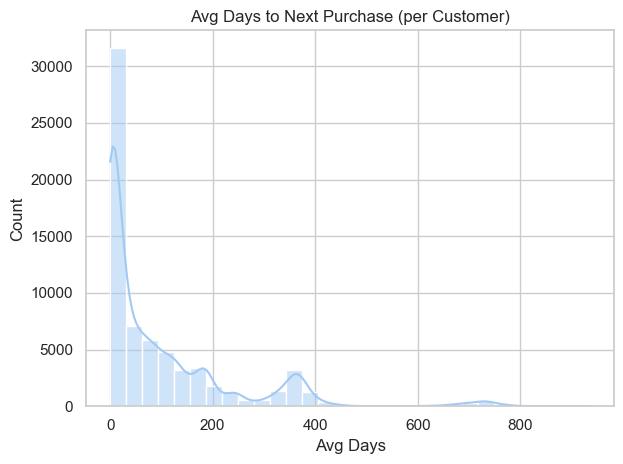

In [19]:
orders_df = orders_df.sort_values(['user.uid', 'createdAt'])
orders_df['next_purchase'] = orders_df.groupby('user.uid')['createdAt'].shift(-1)
orders_df['days_to_next'] = (orders_df['next_purchase'] - orders_df['createdAt']).dt.days
avg_days = orders_df.groupby('user.uid')['days_to_next'].mean().dropna()
sns.histplot(avg_days, bins=30, kde=True)
plt.title("Avg Days to Next Purchase (per Customer)")
plt.xlabel("Avg Days")
plt.tight_layout()
plt.show()